In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
np.random.seed(42)
n_customers = 500
data = {
    'customer_id': np.arange(1, n_customers + 1),
    'group': np.random.choice(['A', 'B'], size=n_customers, p=[0.5, 0.5]),
    'purchase_amount': np.random.normal(loc=100, scale=30, size=n_customers)
}

df = pd.DataFrame(data)



In [4]:
df.loc[np.random.choice(df.index, 10), 'purchase_amount'] = np.nan
df.loc[np.random.choice(df.index, 5), 'purchase_amount'] = df['purchase_amount'] * 10


In [8]:
df

,customer_id,group,purchase_amount
0,1,A,110.252679
1,2,B,156.285125
2,3,B,128.512715
3,4,B,82.692890
4,5,A,73.047560
...,...,...,...
495,496,A,84.073937
496,497,B,85.316817
497,498,A,131.324826
498,499,B,120.456745


In [10]:
df.dropna(inplace=True)

In [12]:
mean = df['purchase_amount'].mean()
std = df['purchase_amount'].std()
df = df[(df['purchase_amount'] >= mean - 3*std) & (df['purchase_amount'] <= mean + 3*std)]


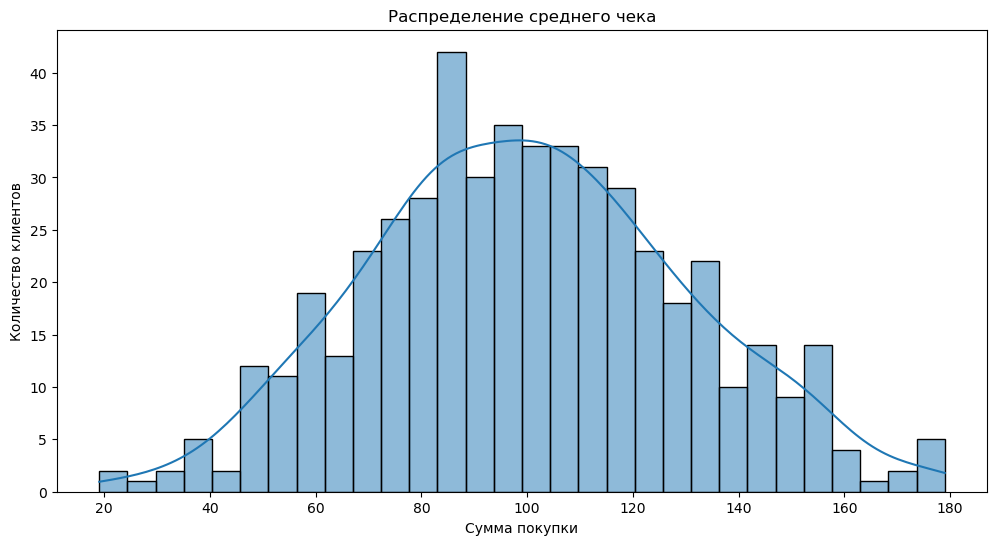

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(df['purchase_amount'], kde=True, bins=30)
plt.title('Распределение среднего чека')
plt.xlabel('Сумма покупки')
plt.ylabel('Количество клиентов')
plt.show()

Распределение среднего чека имеет форму, близкую к нормальной, с небольшим смещением вправо. Большинство клиентов совершают покупки в диапазоне от 70 до 130 единиц. Очистка пропусков и выбросов позволила получить стабильное распределение без аномально больших значений. Данные готовы для дальнейшей проверки гипотез и сегментации клиентов на группы по уровню трат.

In [17]:
grouped = df.groupby('group')['purchase_amount'].agg(['count', 'mean', 'std'])
print(grouped)

       count        mean        std
group                              
A        241   98.629593  29.219717
B        258  101.365114  30.630010


In [21]:
group_A = df[df['group'] == 'A']['purchase_amount']
group_B = df[df['group'] == 'B']['purchase_amount']
print("Проверка нормальности:")
print("Group A:", stats.shapiro(group_A))
print("Group B:", stats.shapiro(group_B))



Проверка нормальности:
Group A: ShapiroResult(statistic=0.9971628885403627, pvalue=0.9471701732666157)
Group B: ShapiroResult(statistic=0.9903902051464188, pvalue=0.08705479435433121)


Обе группы имеют нормальное распределение (p-value > 0.05), значит можно корректно использовать t-тест для сравнения их средних значений.

In [24]:
levene_stat, levene_p = stats.levene(group_A, group_B)
print(f"Levene Test p-value: {levene_p:.4f}")


Levene Test p-value: 0.2397


In [26]:
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=(levene_p > 0.05))
print(f"t-статистика: {t_stat:.4f}, p-значение: {p_value:.4f}")

t-статистика: -1.0193, p-значение: 0.3086


In [28]:
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние чеки различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние чеки не различаются.")


Не отвергаем нулевую гипотезу: средние чеки не различаются.
